In [1]:
import keras
from keras.layers import LSTM
import numpy as np

Using TensorFlow backend.


In [2]:
import data_loader_no_t as dl

In [3]:
data = dl.DataLoader()

In [4]:
X, Y, m = data.load()


In [30]:
from keras.preprocessing.sequence import pad_sequences
len(X)

273

In [6]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')

In [7]:
sample_weights = np.ones((273, m))
for i in xrange(273):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [8]:
from keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [11]:
from keras.layers import Embedding

In [12]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(LSTM(50, return_sequences=True, dropout_W=0.4, dropout_U=0.4))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [15]:
X_train, X_test = X_pad[:136, :], X_pad[136:, :]

In [16]:
Y_train, Y_test = Y_pad[:136, :], Y_pad[136:, :]

In [17]:
sample_weights_train, sample_weights_test = sample_weights[:136, :], sample_weights[136:, :]

In [18]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count

In [19]:
model.fit(X_train, Y_train, batch_size=136, nb_epoch=200, sample_weight=sample_weights_train)

Epoch 1/200
136/136 [==============================] - 24s - loss: 30.9137
Epoch 2/200
136/136 [==============================] - 22s - loss: 30.6715
Epoch 3/200
136/136 [==============================] - 22s - loss: 30.6138
Epoch 4/200
136/136 [==============================] - 23s - loss: 30.4914
Epoch 5/200
136/136 [==============================] - 22s - loss: 30.3537
Epoch 6/200
136/136 [==============================] - 24s - loss: 30.2922
Epoch 7/200
136/136 [==============================] - 26s - loss: 30.2590
Epoch 8/200
136/136 [==============================] - 27s - loss: 30.0115
Epoch 9/200
136/136 [==============================] - 25s - loss: 30.0266
Epoch 10/200
136/136 [==============================] - 22s - loss: 30.0850
Epoch 11/200
136/136 [==============================] - 28s - loss: 29.9376
Epoch 12/200
136/136 [==============================] - 26s - loss: 29.9146
Epoch 13/200
136/136 [==============================] - 26s - loss: 29.7256
Epoch 14/200
136/136 

In [20]:
Y_prediction = model.predict_classes(X_test, batch_size=5)

137/137 [==============================] - 55s    


In [21]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

0.1974906278496403

In [22]:
model.evaluate(X_test, Y_test, batch_size=137, sample_weight=sample_weights_test)

137/137 [==============================] - 6s


24.584018707275391

In [23]:
Y_prediction[0]

array([5, 5, 5, ..., 5, 5, 5])

In [24]:
Y_prediction.shape

(137, 4954)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
len(model.get_weights())

14

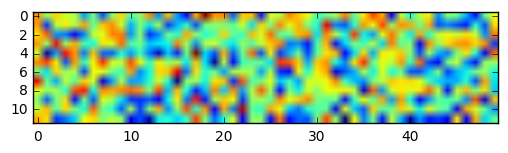

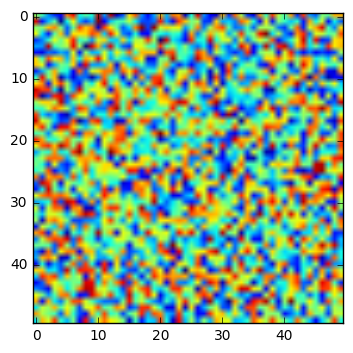

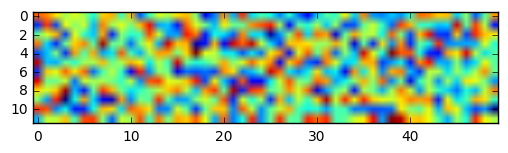

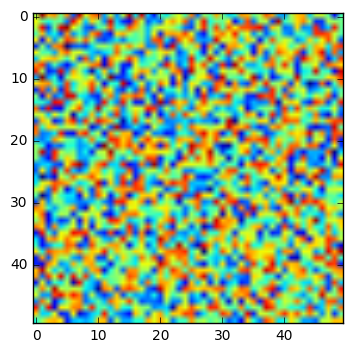

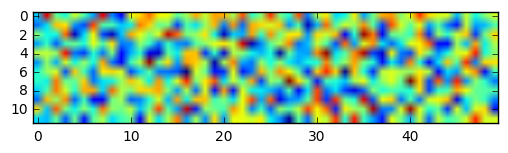

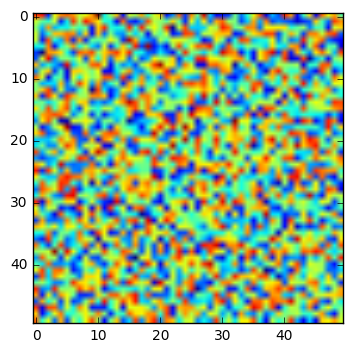

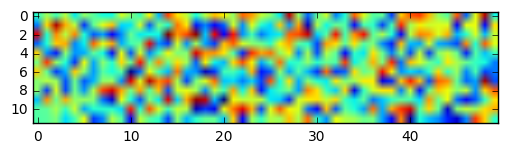

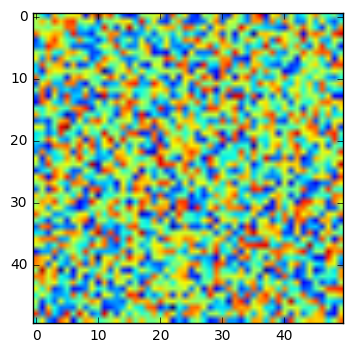

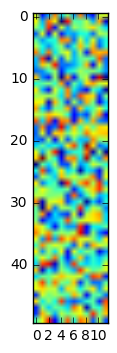

In [27]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [28]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

24536
24631
23842
24683
24416
15209
24750
15311
24601
13120
24810
33696
24712
15522
15560
34128
24711
24788
24653
15084
24663
24764
24736
24923
24986
24797
24745
24764
14862
24523
24832
24741
24844
24755
15870
15190
24607
24687
24796
24770
24811
15027
15102
34402
10223
24770
24772
24723
34251
24320
15717
24479
24633
33148
24624
24635
24749
24654
24791
24921
34324
24800
24688
24774
24572
24770
15395
12074
15472
48534
24793
16034
24863
15145
24636
15049
24541
15416
10519
24725
34028
24581
15502
24608
24827
48736
24816
24602
15528
15134
24780
24805
34417
24923
24745
24792
33846
13343
47398
47765
15384
24781
24787
24649
24402
24823
24582
10310
15028
24639
24752
24413
24842
15130
32989
24717
24671
24767
24773
24689
24761
24760
15014
24716
24573
24677
48640
48382
24588
15508
24663
15371
24691
24730
24679
14903
24632
137
